In [1]:
from data_utils import generate_psf_complex_fields, compute_output_fluxes_from_complex_field, compute_mode_coefficients_from_complex_field
from psf_constants import PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_COMPLEX_FIELDS_PREFIX, \
                          VALIDATION_COMPLEX_FIELDS_PATH, \
                          TEST_COMPLEX_FIELDS_PATH, \
                          TRAIN_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_OUTPUT_FLUXES_FILE_PATH, \
                          NUMPY_SUFFIX

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bars(data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    #plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
    plt.bar([i for i in range(1, 301)], data)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title,fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.axvline(x=100, color='r', linestyle='-')
    plt.axvline(x=200, color='r', linestyle='-')
    plt.show()

def compute_rmse(phases):
    zero_matrix = np.zeros_like(phases)  
    mse = np.mean((phases - zero_matrix)**2)
    rmse = np.sqrt(mse)
    return rmse

def compute_L2_norms_modified(complex_vectors_list):
    L2_sum_list = []
    intensity_sum_list = []
    
    for complex_vector in complex_vectors_list:
        intensity_sum_list.append(np.sum(np.abs(complex_vector)**2)) # Total amount of flux in the image
        L2_sum_list.append(np.sum(np.abs(complex_vector)**4))
        
    return intensity_sum_list, L2_sum_list

Generate PSF with different fried parameter values
- 0.1
- 0.2
- 0.4

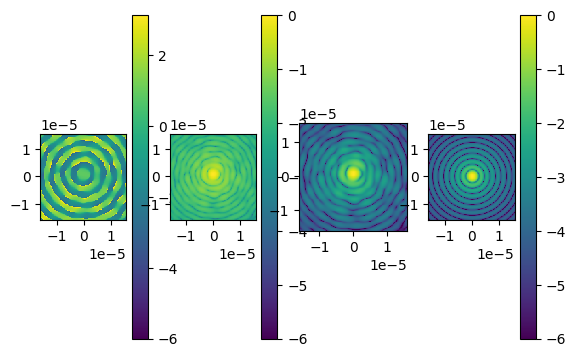

In [2]:
generate_psf_complex_fields('./f01_cf.npy', fried_parameter=0.1, plot=True, n_samples=100, save_wavefront_phase=True)
generate_psf_complex_fields('./f02_cf.npy', fried_parameter=0.2, plot=True, n_samples=100, save_wavefront_phase=True)
generate_psf_complex_fields('./f04_cf.npy', fried_parameter=0.4, plot=True, n_samples=100, save_wavefront_phase=True)

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


Total number of unique modes found: 19
Total number of unique modes found: 19


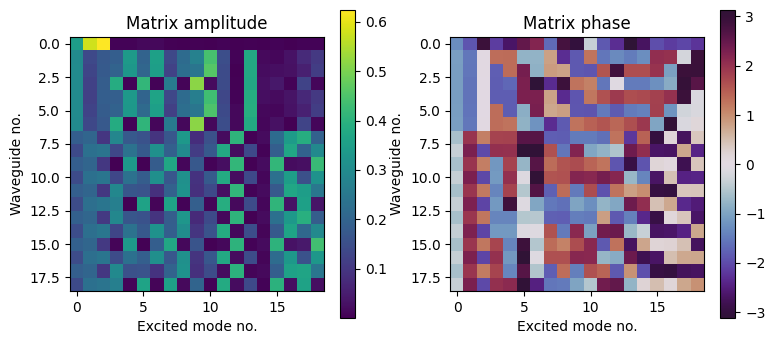

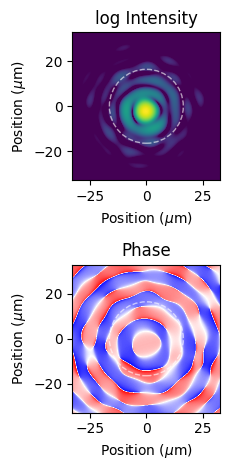

In [3]:
compute_output_fluxes_from_complex_field('./f01_cf.npy', './f01_of.npy')
compute_output_fluxes_from_complex_field('./f02_cf.npy', './f02_of.npy')
compute_output_fluxes_from_complex_field('./f04_cf.npy', './f04_of.npy')

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


Total number of unique modes found: 19
Total number of unique modes found: 19


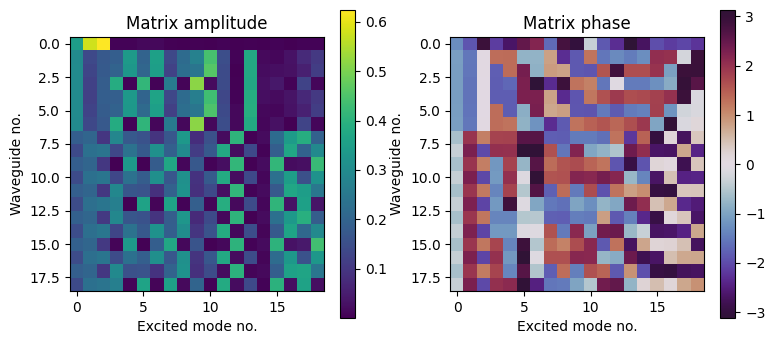

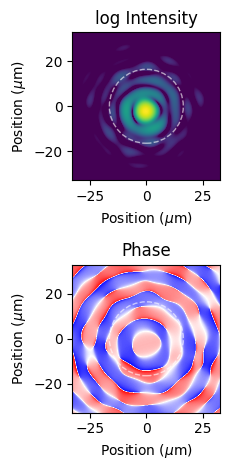

In [4]:
f01_mode_coefficients_list = compute_mode_coefficients_from_complex_field('./f01_cf.npy')
f02_mode_coefficients_list = compute_mode_coefficients_from_complex_field('./f02_cf.npy')
f04_mode_coefficients_list = compute_mode_coefficients_from_complex_field('./f04_cf.npy')

mode_coeffs_list = f01_mode_coefficients_list + f02_mode_coefficients_list + f04_mode_coefficients_list


In [18]:
np_mode_coeffs = np.array(mode_coeffs_list)
first_mode_coeffs = np_mode_coeffs[:,0]

In [8]:
f01_phases = np.load('./f01_cf_phases.npy')
f02_phases = np.load('./f02_cf_phases.npy')
f04_phases = np.load('./f04_cf_phases.npy')

phases = np.concatenate((f01_phases, f02_phases, f04_phases))
rmse_list = []
for phase in phases:
    rmse_list.append(compute_rmse(phase))

In [25]:
f01_output_fluxes = np.load('./f01_of.npy')
f02_output_fluxes = np.load('./f02_of.npy')
f04_output_fluxes = np.load('./f04_of.npy')

output_fluxes = np.concatenate((f01_output_fluxes, f02_output_fluxes, f04_output_fluxes))
intensities_sum_list, L2_sum_list = compute_L2_norms_modified(output_fluxes)

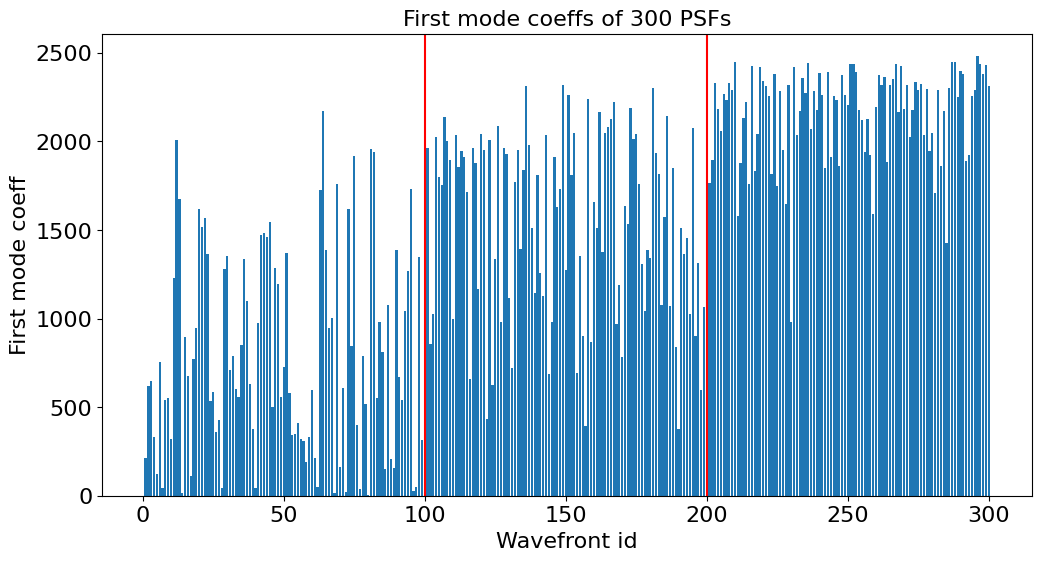

In [22]:
plot_bars(np.abs(first_mode_coeffs)**2, 'First mode coeffs of 300 PSFs', 'Wavefront id', 'First mode coeff')

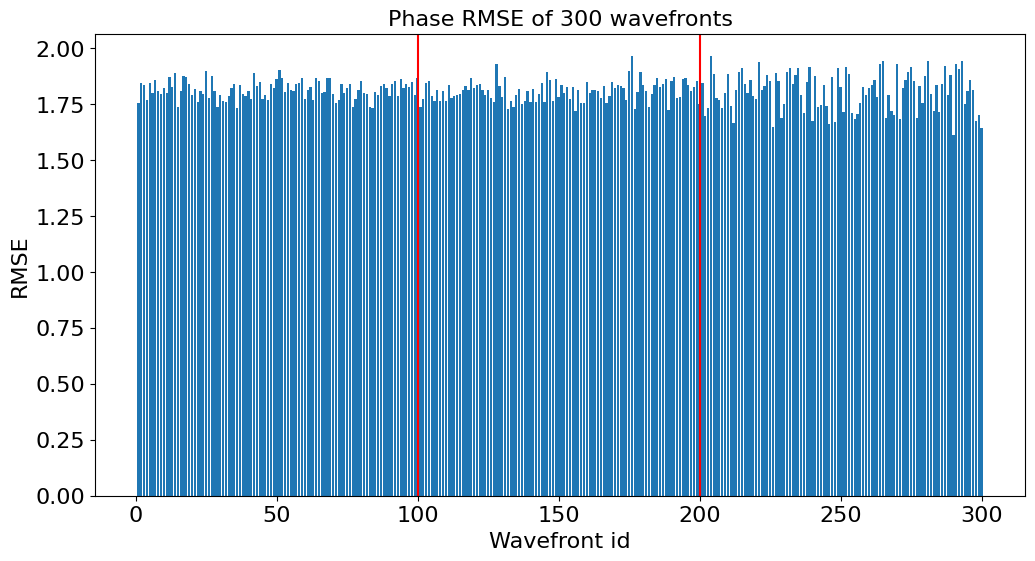

In [16]:
plot_bars(rmse_list, 'Phase RMSE of 300 wavefronts', 'Wavefront id', 'RMSE')

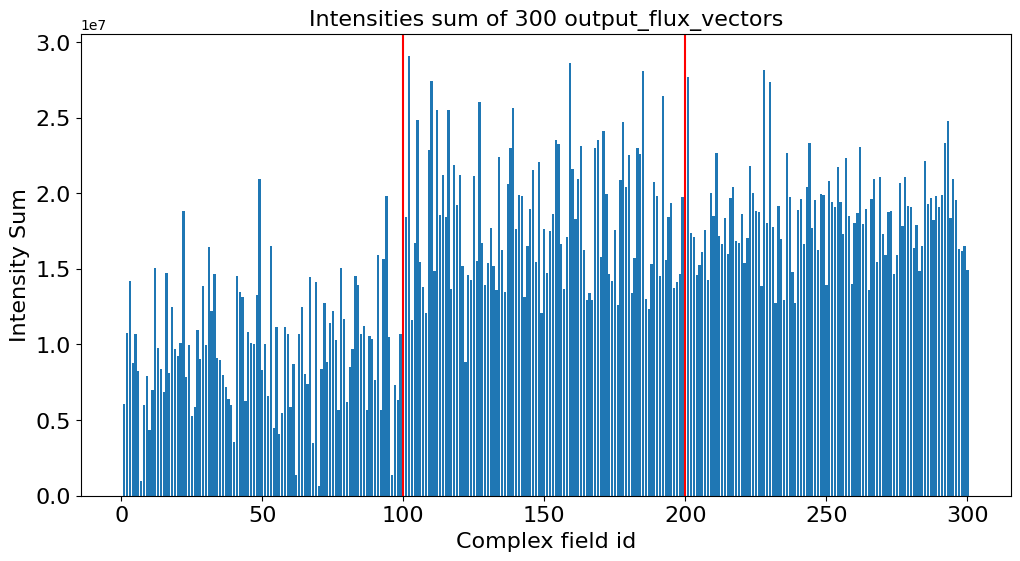

In [28]:
plot_bars(intensities_sum_list, 'Intensities sum of 300 output_flux_vectors', 'Complex field id', 'Intensity Sum')

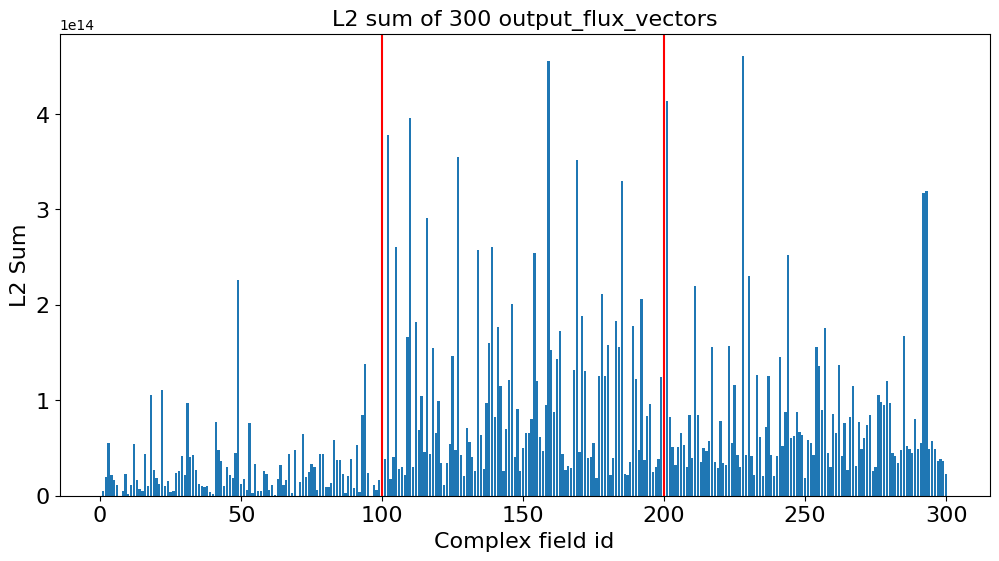

In [27]:
plot_bars(L2_sum_list, 'L2 sum of 300 output_flux_vectors', 'Complex field id', 'L2 Sum')